In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
exp = "ENCFF034WYM"
df = pd.read_csv('../data/H3K36me3.' + exp + '.bed.gz.mm10.bed', sep='\t', comment='t', header=None)
df["len"] = df[2] - df[1]
df

,0,1,2,3,4,len
0,chr1,10022841,10025240,Peak_10672,270,2399
1,chr1,10025912,10027656,Peak_7082,319,1744
2,chr1,10027785,10028029,Peak_22502,181,244
3,chr1,10028181,10029776,Peak_6117,343,1595
4,chr1,10029944,10030682,Peak_25150,170,738
...,...,...,...,...,...,...
103179,chrY,90732178,90732397,Peak_56940,96,219
103180,chrY,90738649,90740632,Peak_144,949,1983
103181,chrY,90740901,90743174,Peak_127,974,2273
103182,chrY,90744302,90745087,Peak_10896,265,785


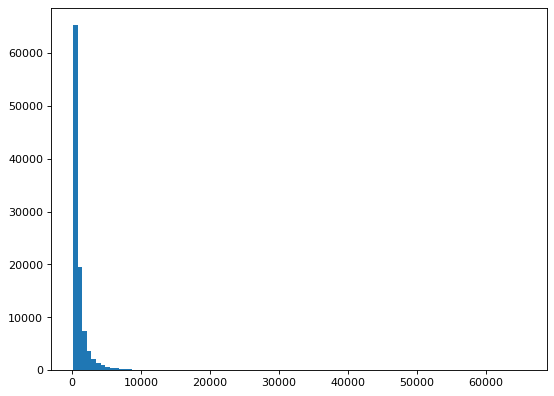

In [24]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df.len, bins = 100)
plt.savefig('../img/' + exp +'_nofilter.pdf')

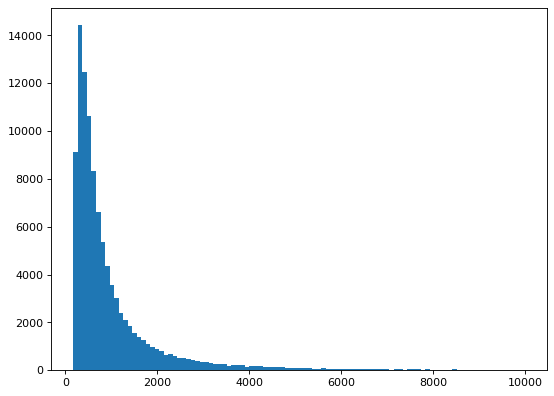

In [25]:
df = df[df["len"] < 10000]
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df.len, bins = 100)
plt.savefig('../img/' + exp + '_filter.pdf')

In [27]:
df_ENCFF034WYM = df.copy()

In [28]:
exp = "ENCFF633VDV"
df = pd.read_csv('../data/H3K36me3.' + exp + '.bed.gz.mm10.bed', sep='\t', comment='t', header=None)
df["len"] = df[2] - df[1]
df

,0,1,2,3,4,len
0,chr1,10022342,10022859,Peak_122423,46,517
1,chr1,10022928,10025221,Peak_8561,368,2293
2,chr1,10025344,10025845,Peak_38947,142,501
3,chr1,10025934,10027692,Peak_9197,356,1758
4,chr1,10027747,10029823,Peak_6054,428,2076
...,...,...,...,...,...,...
108572,chrY,90738636,90740639,Peak_1009,768,2003
108573,chrY,90740895,90743207,Peak_685,844,2312
108574,chrY,90744292,90745064,Peak_14587,282,772
108575,chrY,90745168,90745930,Peak_3689,521,762


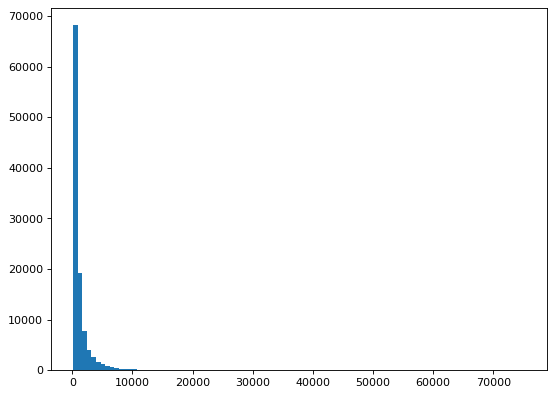

In [29]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df.len, bins = 100)
plt.savefig('../img/' + exp +'_nofilter.pdf')

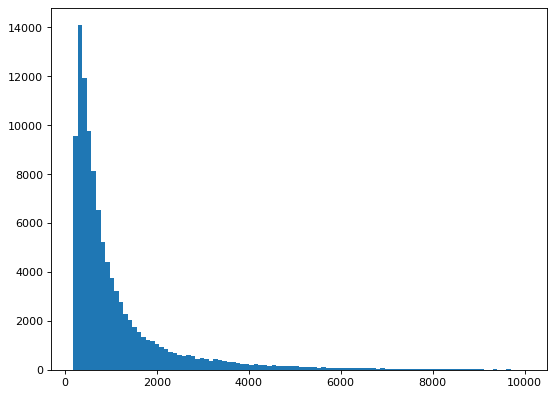

In [30]:
df = df[df["len"] < 10000]
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df.len, bins = 100)
plt.savefig('../img/' + exp + '_filter.pdf')

In [33]:
df_ENCFF633VDV = df.copy()

In [34]:
df_ENCFF034WYM.to_csv('../data/H3K36me3.ENCFF034WYM.filtered.bed', sep ='\t', header=None, index=None)
df_ENCFF633VDV.to_csv('../data/H3K36me3.ENCFF633VDV.filtered.bed', sep ='\t', header=None, index=None)
all_exp.to_csv('../data/H3K36me3.filtered.bed', sep ='\t', header=None, index=None) # склеил тут а не позже

In [35]:
group = all_exp.groupby(0)
min_start = group.min()[1].to_frame()
max_end = group.max()[2].to_frame()

min_start["chr"] = min_start.index
max_end["chr"] = max_end.index
region = min_start.merge(max_end, how='inner', on = "chr")
for index, row in region.iterrows():
    start = row[1]
    end = row[2]
    print(row["chr"], row[1], row[2])

chr1 4770333 195130061
chr10 3115137 130566642
chr11 3130159 121952096
chr12 3236501 118299988
chr13 3484829 119789411
chr14 7830540 122972567
chr15 3274437 103364140
chr16 3745669 98080164
chr17 3064143 94876788
chr18 3386601 90593154
chr19 3259707 61136386
chr2 3203035 181894545
chr3 5242789 159534882
chr4 3537746 156252237
chr5 3099308 151650179
chr6 3375494 149337480
chr7 3294887 145280316
chr8 3153632 129283296
chr9 3336648 124477023
chrX 7160939 170815920
chrY 259142 90745930


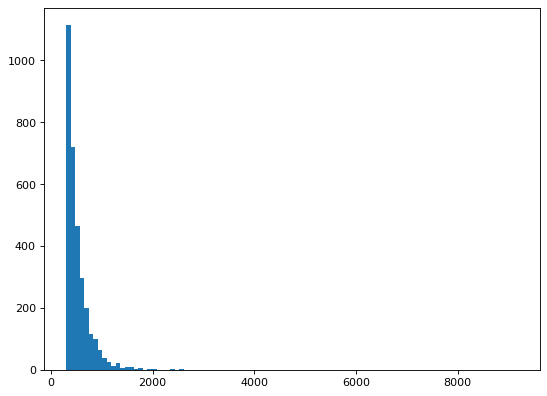

In [36]:
df = pd.read_csv('../data/mouseZ-DNA1.bed', sep='\t', comment='t', header=None)
df["len"] = df[2] - df[1]
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df.len, bins = 100)
plt.savefig('../img/ZDNA.pdf')